# The Data

<img src=https://i.imgur.com/IZrcN3s.jpg>

## Mushroom Hunting: Edible or Poisonous?


This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms. Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one.


Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../DATA/mushrooms.csv")

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.shape

(8124, 23)

In [5]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

# Exploratory Data Analysis

In [8]:
X = df.drop(['class'],axis= 1)
X = pd.get_dummies(X,drop_first=True)
X

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [9]:
y= df['class']
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

<AxesSubplot:xlabel='class', ylabel='count'>

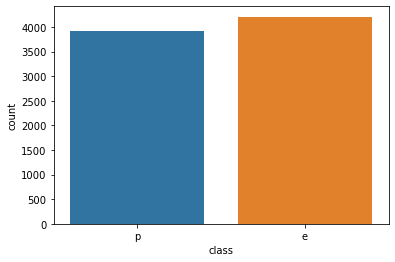

In [10]:
sns.countplot(data=df, x= 'class')  # Pretty well Balanced Dataset.

In [11]:
df.describe().transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [12]:
data_describe = df.describe().transpose().reset_index().sort_values('unique')
data_describe

,index,count,unique,top,freq
16,veil-type,8124,1,p,8124
0,class,8124,2,e,4208
4,bruises,8124,2,f,4748
6,gill-attachment,8124,2,f,7914
7,gill-spacing,8124,2,c,6812
8,gill-size,8124,2,b,5612
10,stalk-shape,8124,2,t,4608
18,ring-number,8124,3,o,7488
2,cap-surface,8124,4,y,3244
17,veil-color,8124,4,w,7924


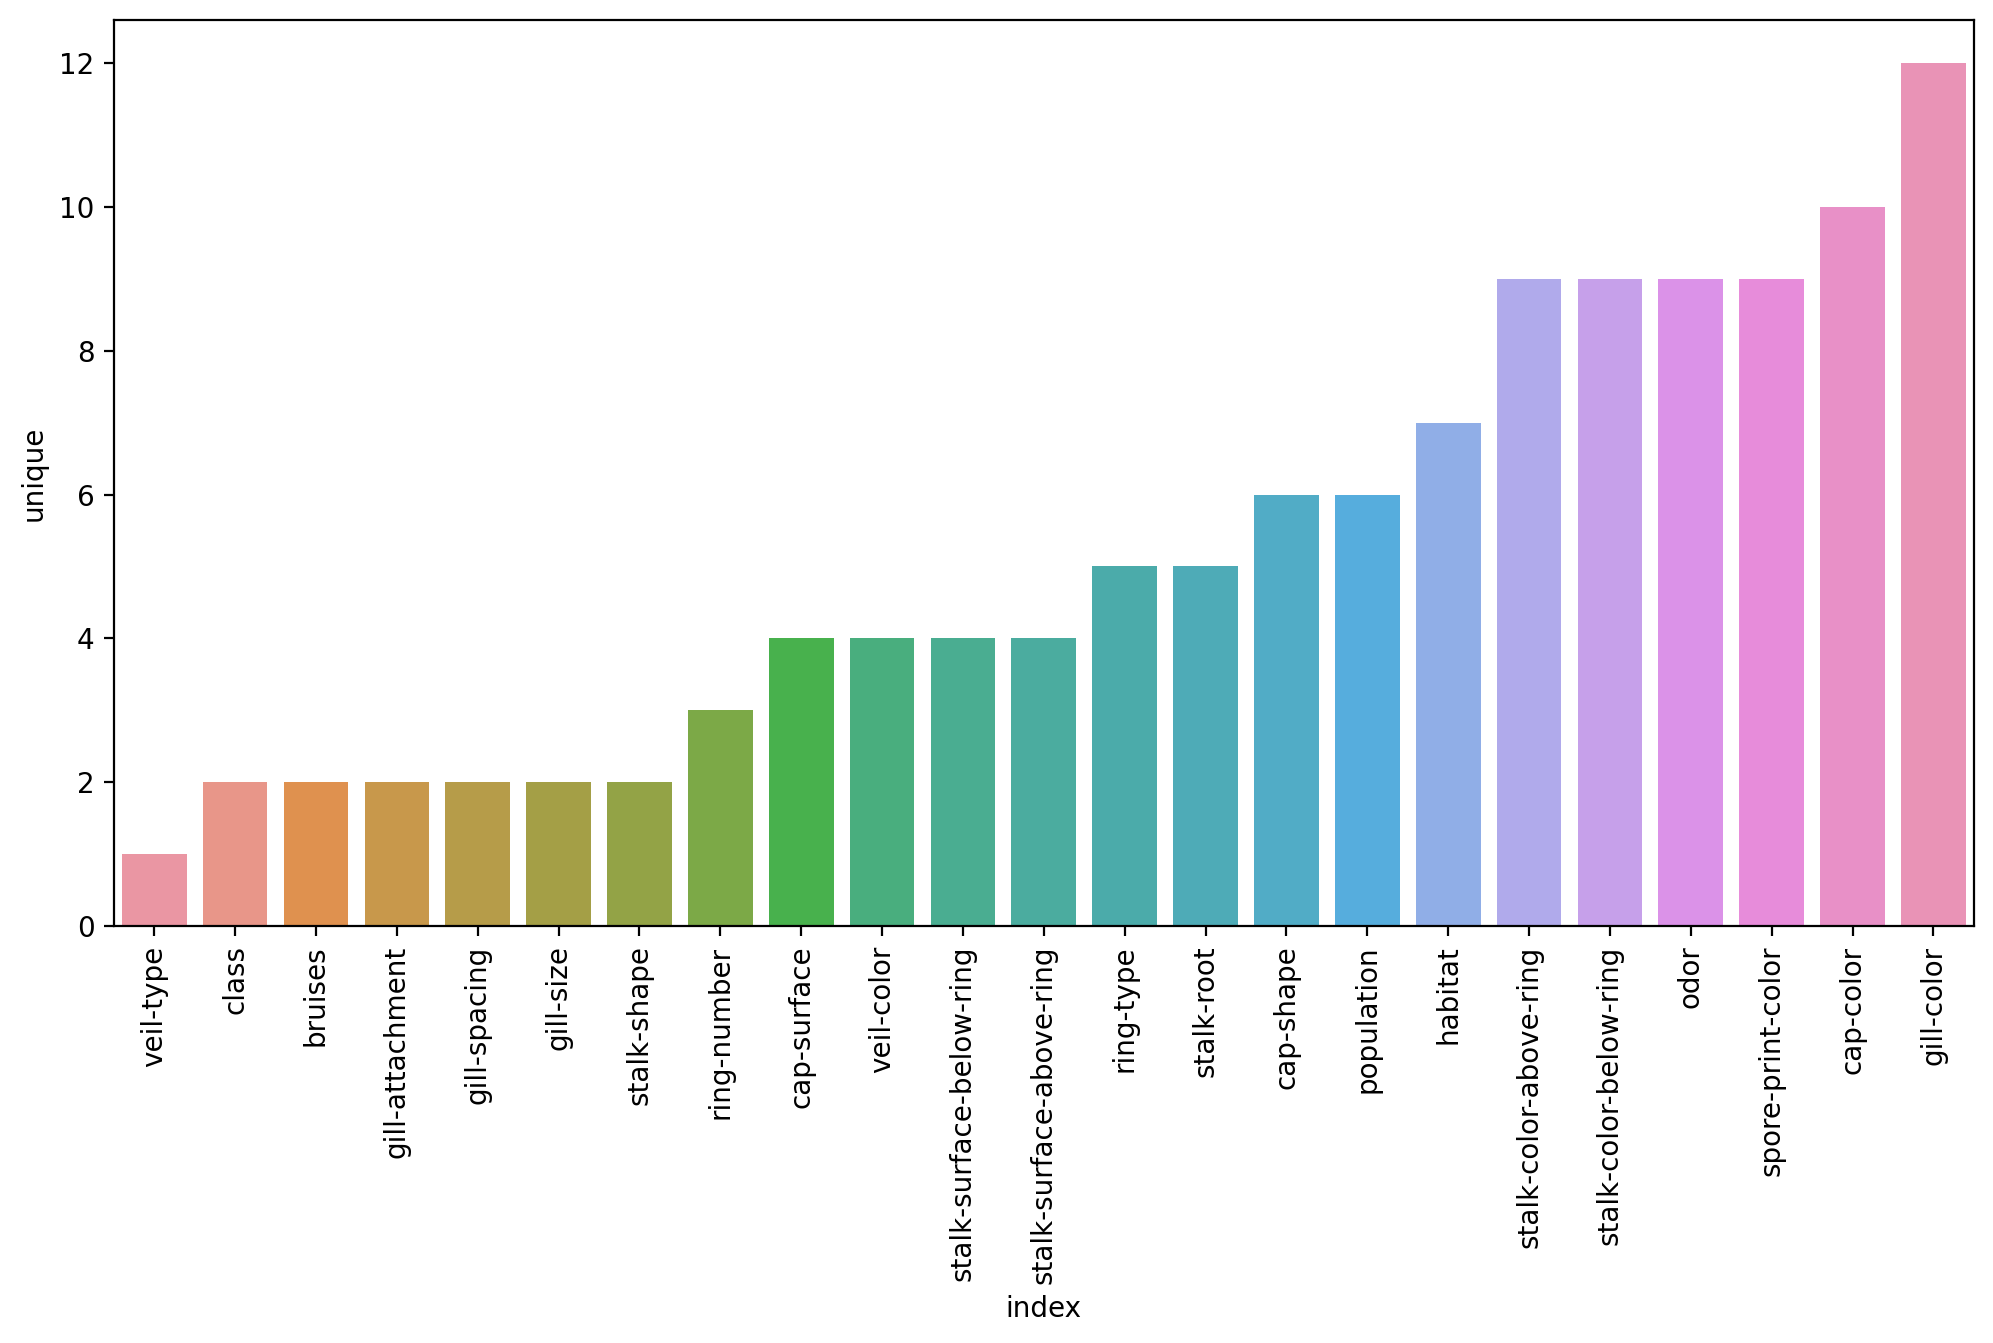

In [13]:
plt.figure(figsize=(12,6),dpi=200)
sns.barplot(data=data_describe, x='index', y='unique')
plt.xticks(rotation=90);

# Train | Test Split

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, plot_confusion_matrix

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# <<<<<<M.L Models>>>>>>

In [16]:
def report_model(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))
    plot_confusion_matrix(model,X_test,y_test)
    

## Ada Boost

In [17]:
from sklearn.ensemble import AdaBoostClassifier

In [18]:
ada_model = AdaBoostClassifier(n_estimators=1)

              precision    recall  f1-score   support

           e       0.95      0.80      0.87       851
           p       0.81      0.96      0.88       774

    accuracy                           0.88      1625
   macro avg       0.88      0.88      0.87      1625
weighted avg       0.89      0.88      0.87      1625



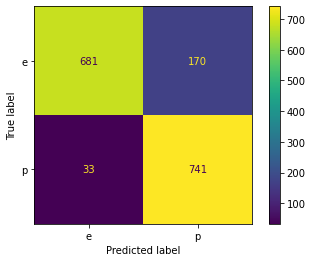

In [19]:
report_model(ada_model)

# Evaluate

In [20]:
from sklearn.metrics import accuracy_score

accuracy_error = []
for n in range(1,100):
    model=AdaBoostClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    error = 1 - accuracy_score(y_test, y_pred)
    accuracy_error.append(error)
    
    
    

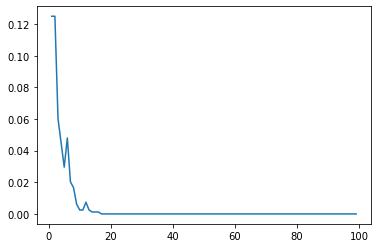

In [21]:
plt.plot(range(1,100), accuracy_error) # Looks like n_estimators around 20 is Sweet spot

In [22]:
ada_model = AdaBoostClassifier(n_estimators=20)

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       851
           p       1.00      1.00      1.00       774

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



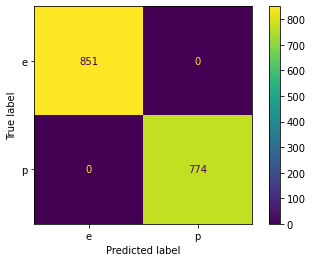

In [23]:
report_model(ada_model)

In [24]:
features = ada_model.feature_importances_
features

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.05, 0.05, 0.05, 0.  , 0.  ,
       0.1 , 0.05, 0.  , 0.  , 0.  , 0.05, 0.15, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.05, 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.05, 0.  , 0.1 , 0.  , 0.05, 0.  , 0.  , 0.1 ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [25]:
imp_features = pd.DataFrame(index = X.columns, data= features, columns=['Important Features']).sort_values('Important Features')
imp_features = imp_features[imp_features['Important Features']>0]
imp_features

,Important Features
stalk-surface-above-ring_k,0.05
odor_p,0.05
gill-spacing_w,0.05
stalk-surface-below-ring_y,0.05
odor_f,0.05
odor_c,0.05
bruises_t,0.05
spore-print-color_r,0.05
cap-color_w,0.05
population_c,0.05


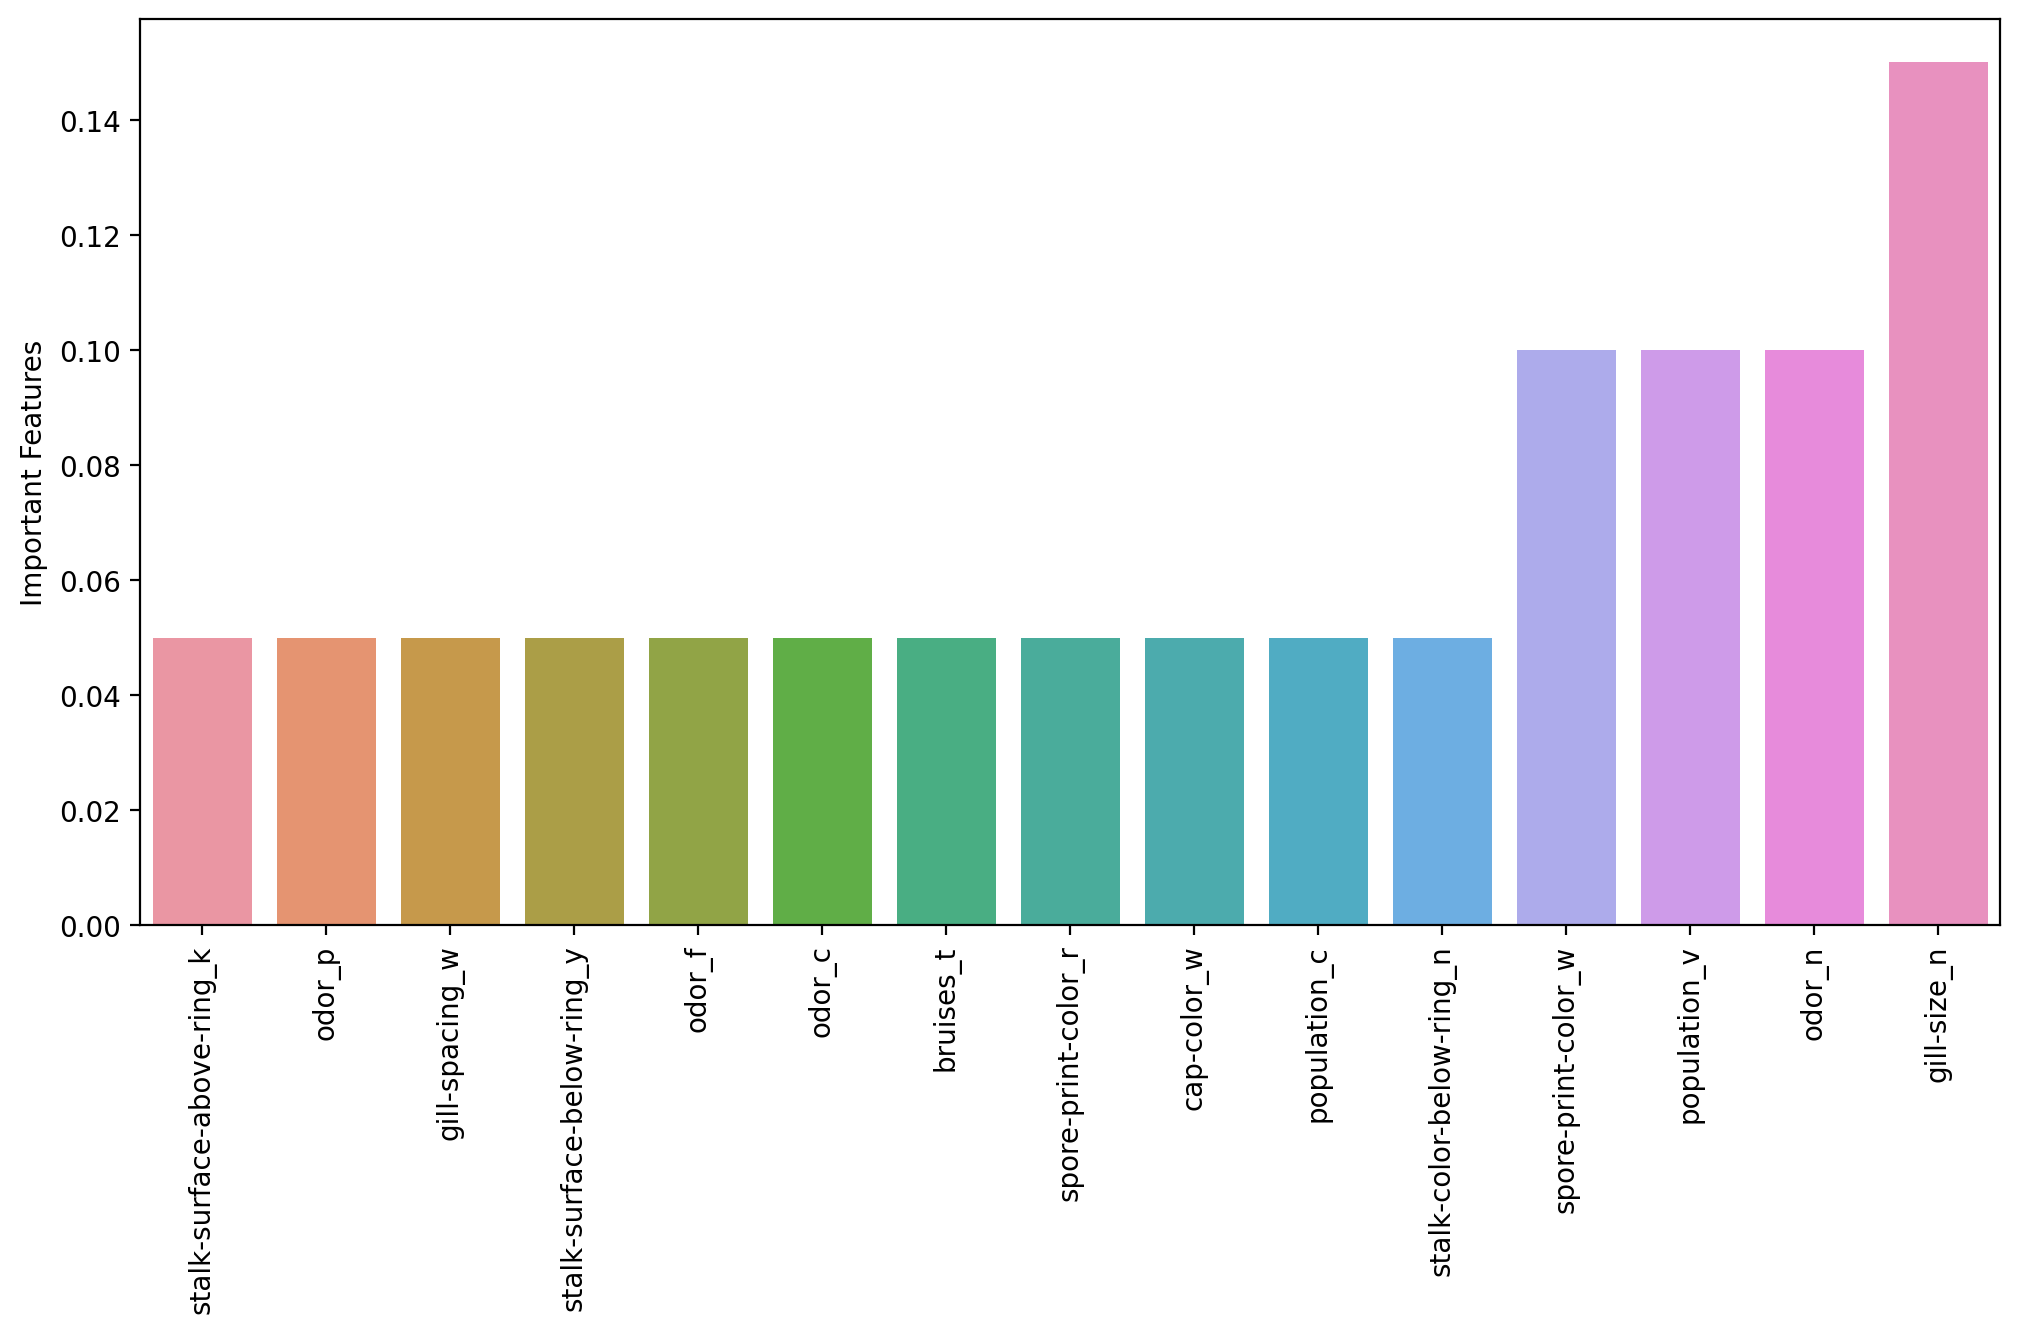

In [26]:
plt.figure(figsize=(12,6),dpi=200)
sns.barplot(x=imp_features.index, y=imp_features['Important Features'])
plt.xticks(rotation=90);
# From Barplot , we can see that gill-size_n is most Importance feature in this model

<AxesSubplot:xlabel='habitat', ylabel='count'>

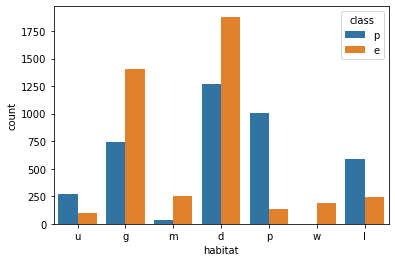

In [27]:
sns.countplot(data=df, x='habitat',hue='class')

## Gradient Boosting and Grid Search with CV

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

In [29]:
gbc_model = GradientBoostingClassifier()

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
parameters = {'learning_rate':[0.05,0.1,0.2,0.5],
              'n_estimators':[50,100,150]
             }

In [32]:
grid_model = GridSearchCV(gbc_model,param_grid=parameters)

In [33]:
grid_model.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.05, 0.1, 0.2, 0.5],
                         'n_estimators': [50, 100, 150]})

In [34]:
y_pred = model.predict(X_test)

## Performance

In [35]:
print(classification_report(y_test,y_pred))
    

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       851
           p       1.00      1.00      1.00       774

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



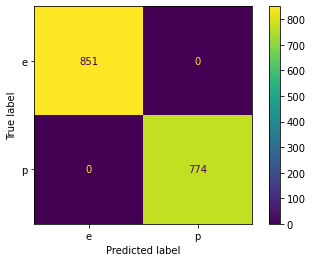

In [36]:
plot_confusion_matrix(model,X_test,y_test)

In [37]:
grid_model.best_params_

{'learning_rate': 0.1, 'n_estimators': 150}

In [38]:
features = grid_model.best_estimator_.feature_importances_
features

array([3.34036532e-04, 5.61048428e-17, 6.23961796e-18, 3.91764711e-07,
       1.12324468e-21, 1.27308767e-03, 5.18881533e-16, 9.86761091e-19,
       5.21146462e-06, 1.85018368e-18, 0.00000000e+00, 0.00000000e+00,
       4.52515500e-19, 4.32684958e-17, 0.00000000e+00, 6.50778488e-10,
       2.42654229e-03, 5.41684228e-02, 7.59870697e-04, 2.17587813e-02,
       1.98378399e-02, 9.91160706e-05, 6.18812038e-01, 3.95930597e-03,
       0.00000000e+00, 0.00000000e+00, 2.34012429e-18, 1.28019299e-02,
       1.08122288e-02, 0.00000000e+00, 1.53102805e-16, 6.52971477e-17,
       0.00000000e+00, 1.93412001e-17, 0.00000000e+00, 7.04264929e-17,
       8.11232269e-23, 2.24648936e-21, 6.21161133e-18, 8.78221334e-19,
       1.17489218e-07, 2.01549995e-05, 1.32150154e-01, 4.67676940e-03,
       4.85502691e-02, 5.15339463e-04, 2.45624000e-05, 7.63905743e-05,
       1.15326277e-16, 1.19874844e-06, 1.88625199e-02, 3.13408769e-03,
       0.00000000e+00, 0.00000000e+00, 5.17953908e-04, 0.00000000e+00,
      

In [39]:
imp_features = pd.DataFrame(index = X.columns, data= features, columns=['Important Features']).sort_values('Important Features')
imp_features = imp_features[imp_features['Important Features']>0.001]
imp_features

,Important Features
stalk-color-below-ring_w,0.001142
cap-surface_g,0.001273
population_c,0.001301
stalk-color-above-ring_w,0.002155
cap-color_y,0.002427
stalk-color-below-ring_y,0.002538
stalk-color-above-ring_c,0.003134
odor_p,0.003959
stalk-root_e,0.004677
spore-print-color_u,0.004685


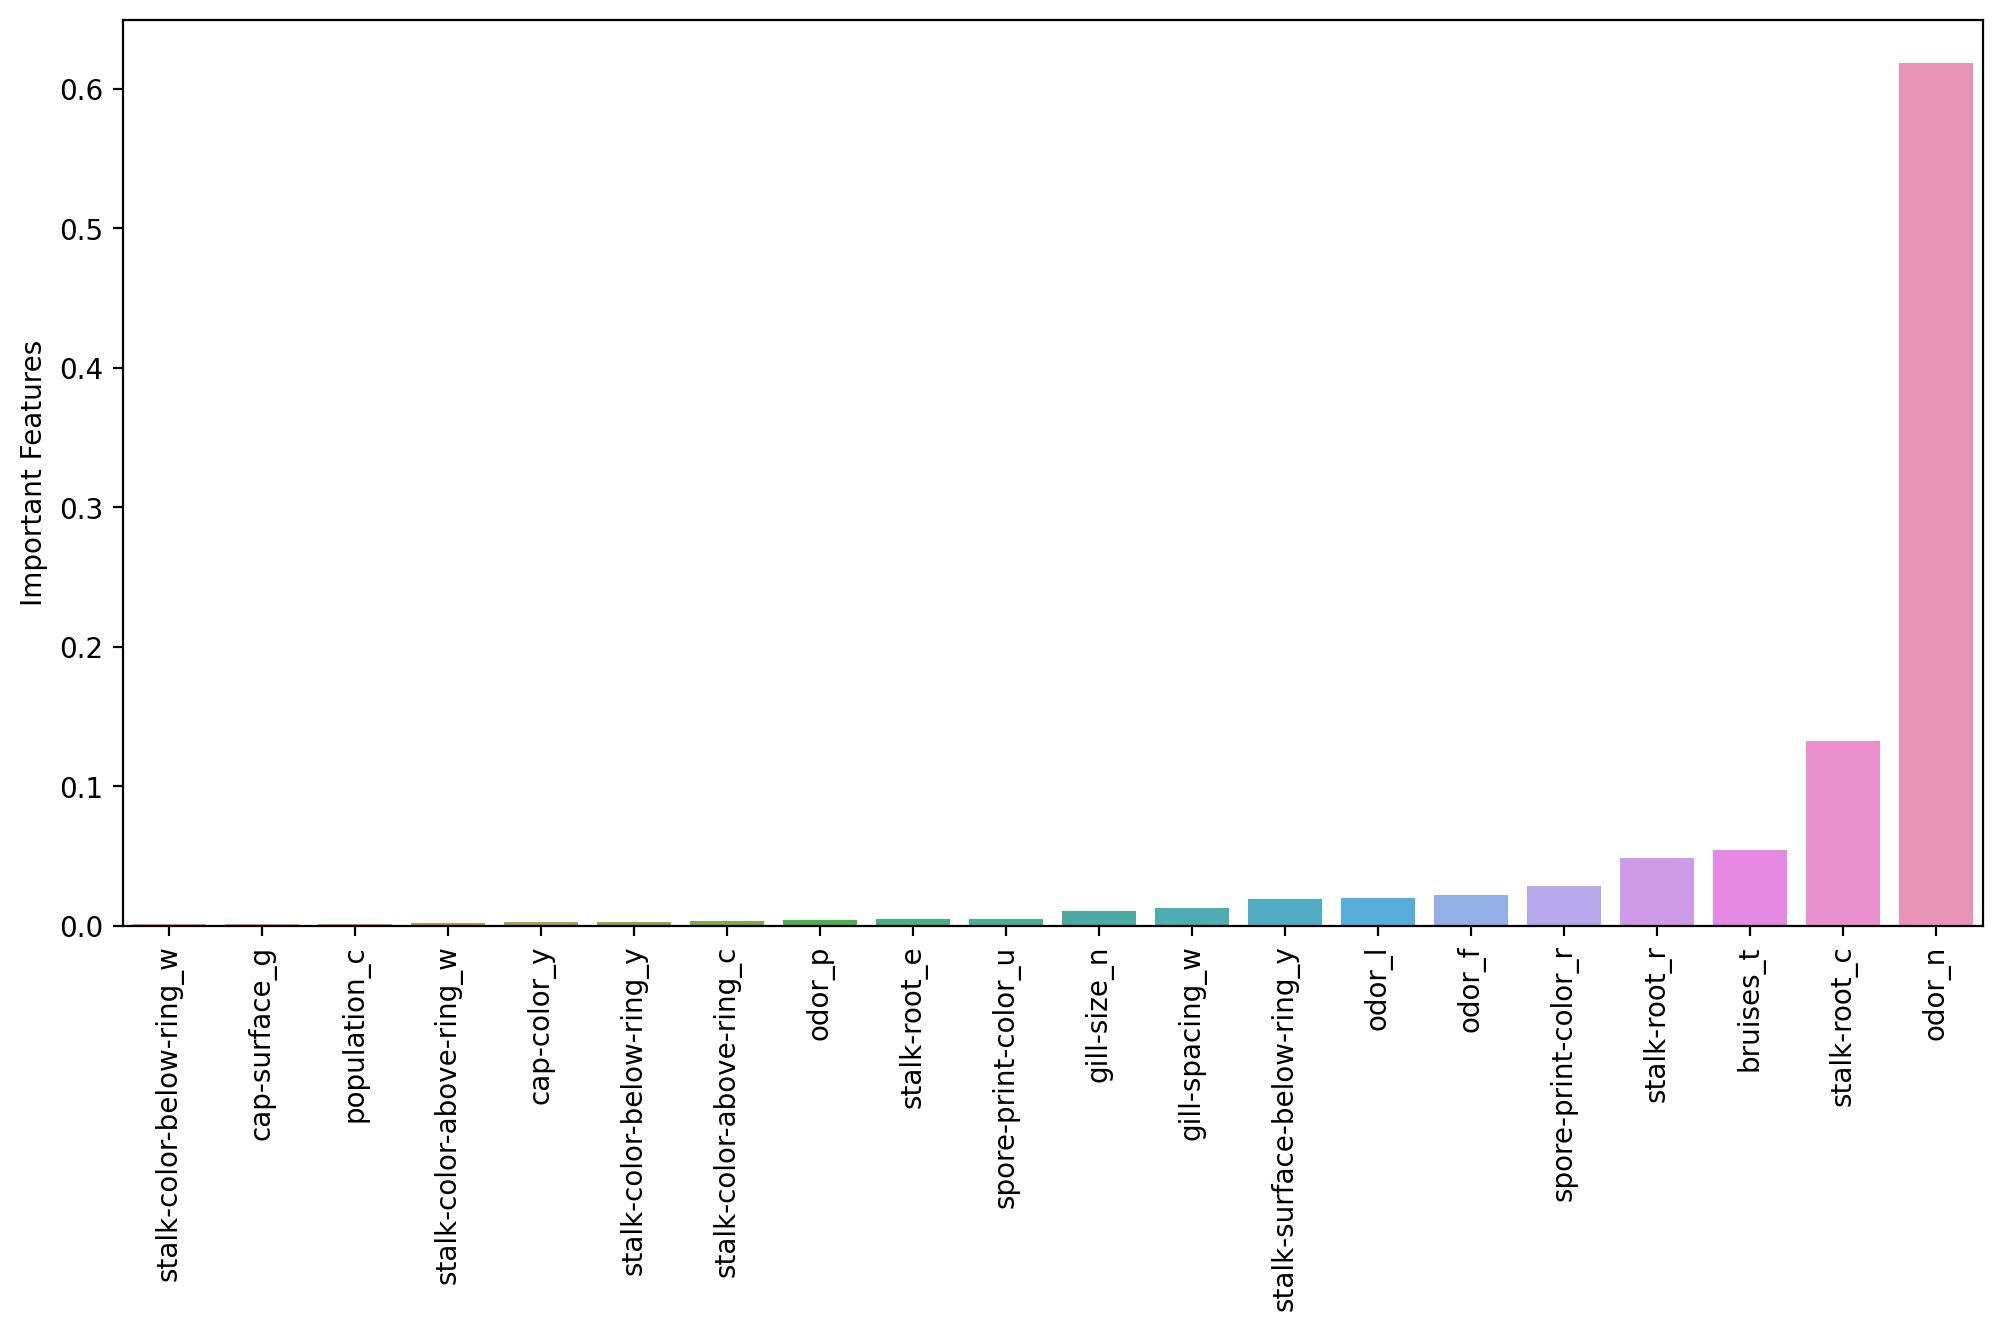

In [40]:
plt.figure(figsize=(12,6),dpi=200)
sns.barplot(x=imp_features.index, y=imp_features['Important Features'])
plt.xticks(rotation=90);
# odor_n is most Important Feature in this model